<a href="https://colab.research.google.com/github/FaizarM/credit-risk-prediction/blob/main/Final_Task_ID_X_Partners_Data_Scientist_Muhammad_Fariz_Abizar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("loan_data_2007_2014.csv")

print("Jumlah baris dan kolom:", df.shape)
df.info()


/tmp/ipython-input-3401124338.py:6: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan_data_2007_2014.csv")


Jumlah baris dan kolom: (466285, 75)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length           

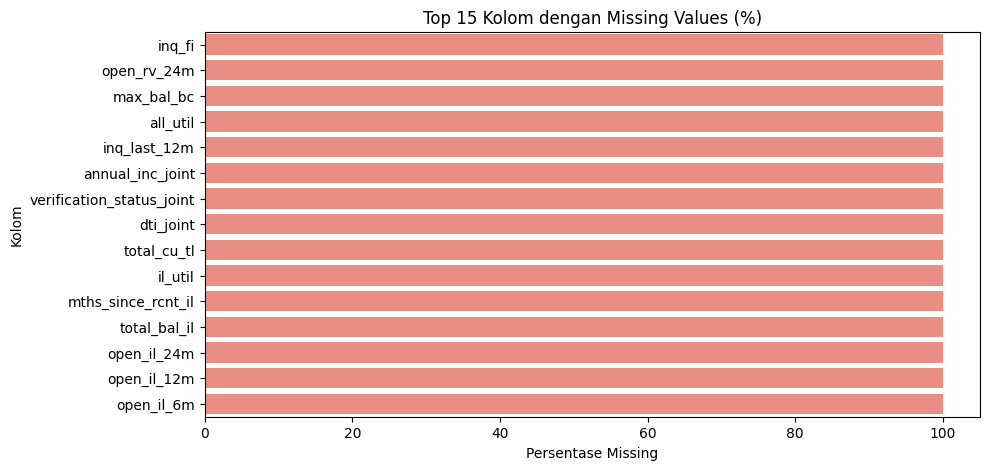

In [ ]:
# Hitung missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({"missing_values": missing, "percent": missing_percent})
missing_df = missing_df[missing_df["missing_values"] > 0].sort_values(by="missing_values", ascending=False)

# Tampilkan 20 kolom dengan missing terbanyak
missing_df.head(15)

# Visualisasi missing values
plt.figure(figsize=(10,5))
sns.barplot(y=missing_df.head(15).index, x=missing_df.head(15)["percent"], color="salmon")
plt.title("Top 15 Kolom dengan Missing Values (%)")
plt.xlabel("Persentase Missing")
plt.ylabel("Kolom")
plt.show()


loan_status
Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: proportion, dtype: float64


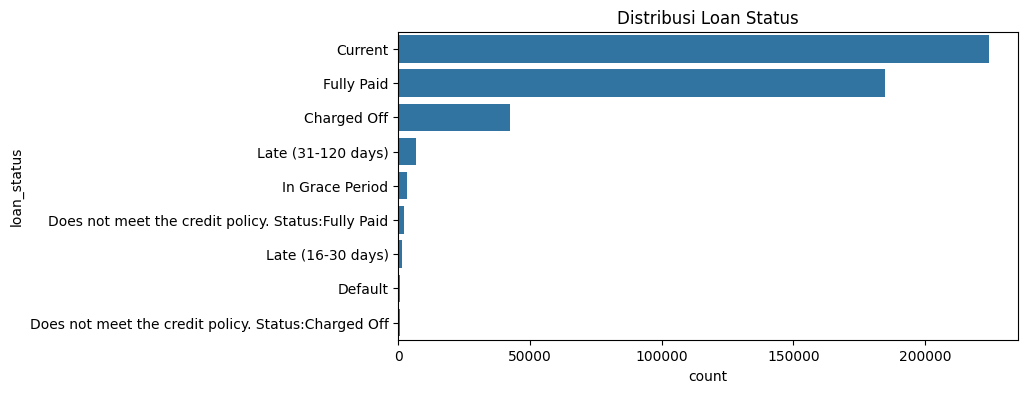

In [ ]:
# Distribusi target
print(df["loan_status"].value_counts(normalize=True) * 100)

# Visualisasi distribusi loan_status
plt.figure(figsize=(8,4))
sns.countplot(y="loan_status", data=df, order=df["loan_status"].value_counts().index)
plt.title("Distribusi Loan Status")
plt.show()


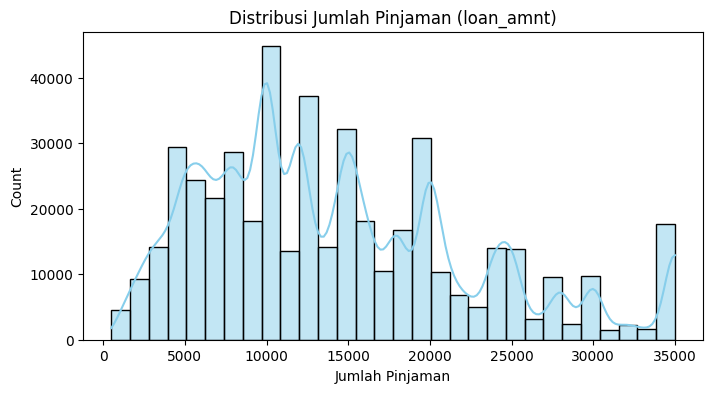

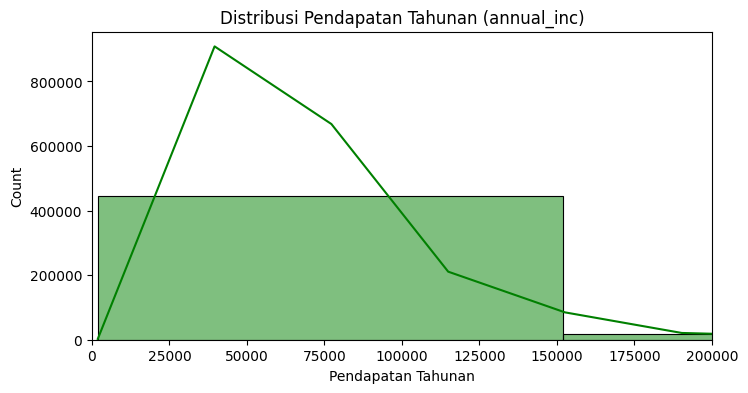

In [ ]:
# Distribusi jumlah pinjaman (loan_amnt)
plt.figure(figsize=(8,4))
sns.histplot(df["loan_amnt"], bins=30, kde=True, color="skyblue")
plt.title("Distribusi Jumlah Pinjaman (loan_amnt)")
plt.xlabel("Jumlah Pinjaman")
plt.show()

# Distribusi pendapatan tahunan (annual_inc)
plt.figure(figsize=(8,4))
sns.histplot(df["annual_inc"], bins=50, kde=True, color="green")
plt.title("Distribusi Pendapatan Tahunan (annual_inc)")
plt.xlabel("Pendapatan Tahunan")
plt.xlim(0, 200000)  # batasi agar tidak terlalu panjang
plt.show()


/tmp/ipython-input-3919547535.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="grade", data=df, order=df["grade"].value_counts().index, palette="viridis")


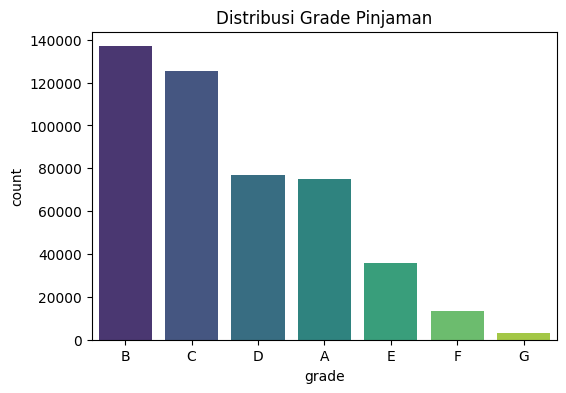

/tmp/ipython-input-3919547535.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="term", data=df, order=df["term"].value_counts().index, palette="muted")


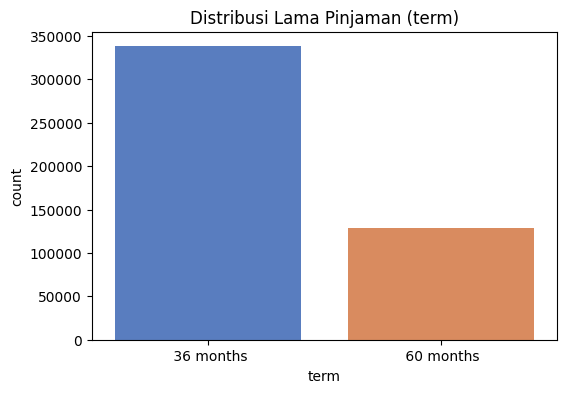

In [ ]:
# Distribusi Grade
plt.figure(figsize=(6,4))
sns.countplot(x="grade", data=df, order=df["grade"].value_counts().index, palette="viridis")
plt.title("Distribusi Grade Pinjaman")
plt.show()

# Distribusi Lama Pinjaman (term)
plt.figure(figsize=(6,4))
sns.countplot(x="term", data=df, order=df["term"].value_counts().index, palette="muted")
plt.title("Distribusi Lama Pinjaman (term)")
plt.show()


In [ ]:
# Drop kolom ID yang tidak relevan
drop_cols = ["id", "member_id", "Unnamed: 0"]
df = df.drop(columns=drop_cols, errors="ignore")

# Transformasi target loan_status
print("Sebelum transformasi:", df["loan_status"].value_counts())

# Gunakan hanya Fully Paid & Charged Off
df = df[df["loan_status"].isin(["Fully Paid", "Charged Off"])]

# Binary encoding: Fully Paid=0, Charged Off=1
df["loan_status"] = df["loan_status"].map({"Fully Paid": 0, "Charged Off": 1})

print("Sesudah transformasi:", df["loan_status"].value_counts())

Sebelum transformasi: loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64
Sesudah transformasi: loan_status
0    184739
1     42475
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Drop kolom dengan missing > 50%
missing_ratio = df.isnull().sum() / len(df)
df = df.drop(columns=missing_ratio[missing_ratio > 0.5].index)

# Imputasi missing values
for col in df.columns:
    if df[col].dtype in ["float64", "int64"]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Encoding variabel kategorikal
categorical_cols = df.select_dtypes(include=["object"]).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Log transform annual_inc untuk mengurangi outlier
df["annual_inc_log"] = np.log1p(df["annual_inc"])

# Buat fitur baru: rasio installment terhadap income
df["installment_to_income"] = df["installment"] / (df["annual_inc"] + 1)

# Scaling fitur numerik (penting untuk Logistic Regression)
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.drop("loan_status")
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Dataset siap dipakai modelling:", df.shape)


Dataset siap dipakai modelling: (227214, 52)


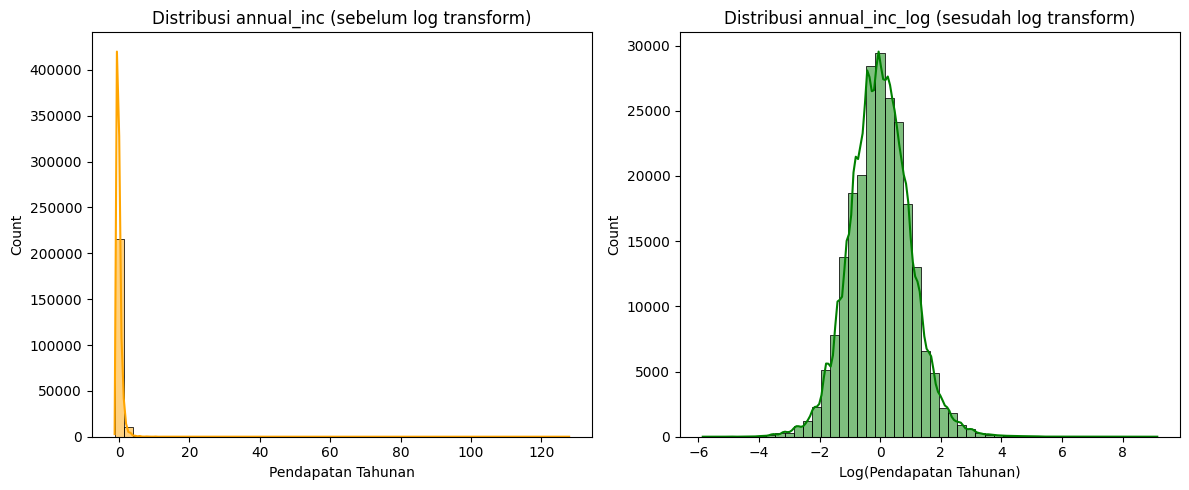

In [ ]:
plt.figure(figsize=(12,5))

# Sebelum log transform
plt.subplot(1,2,1)
sns.histplot(df["annual_inc"], bins=50, kde=True, color="orange")
plt.title("Distribusi annual_inc (sebelum log transform)")
plt.xlabel("Pendapatan Tahunan")

# Sesudah log transform
plt.subplot(1,2,2)
sns.histplot(df["annual_inc_log"], bins=50, kde=True, color="green")
plt.title("Distribusi annual_inc_log (sesudah log transform)")
plt.xlabel("Log(Pendapatan Tahunan)")

plt.tight_layout()
plt.show()


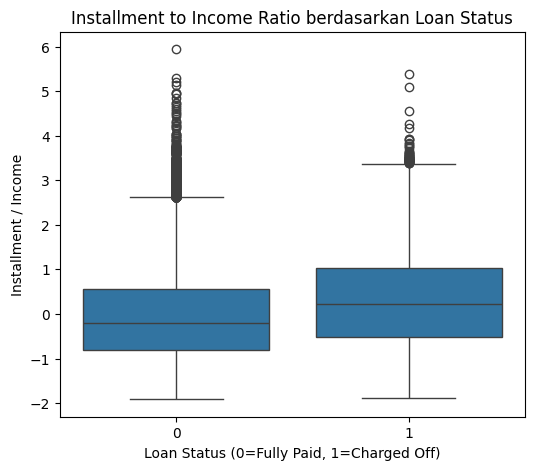

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x="loan_status", y="installment_to_income", data=df)
plt.title("Installment to Income Ratio berdasarkan Loan Status")
plt.xlabel("Loan Status (0=Fully Paid, 1=Charged Off)")
plt.ylabel("Installment / Income")
plt.show()


/tmp/ipython-input-2235435796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="loan_status", data=df, palette="Set2")


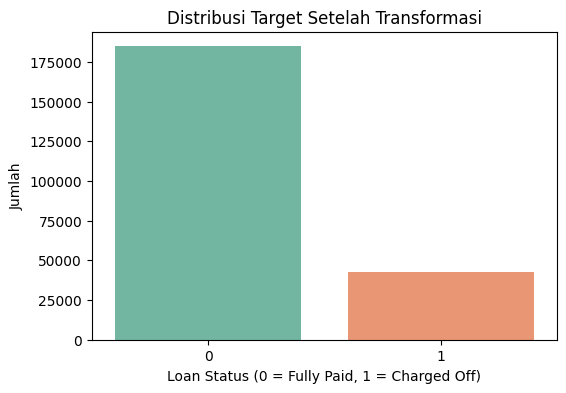

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="loan_status", data=df, palette="Set2")
plt.title("Distribusi Target Setelah Transformasi")
plt.xlabel("Loan Status (0 = Fully Paid, 1 = Charged Off)")
plt.ylabel("Jumlah")
plt.show()


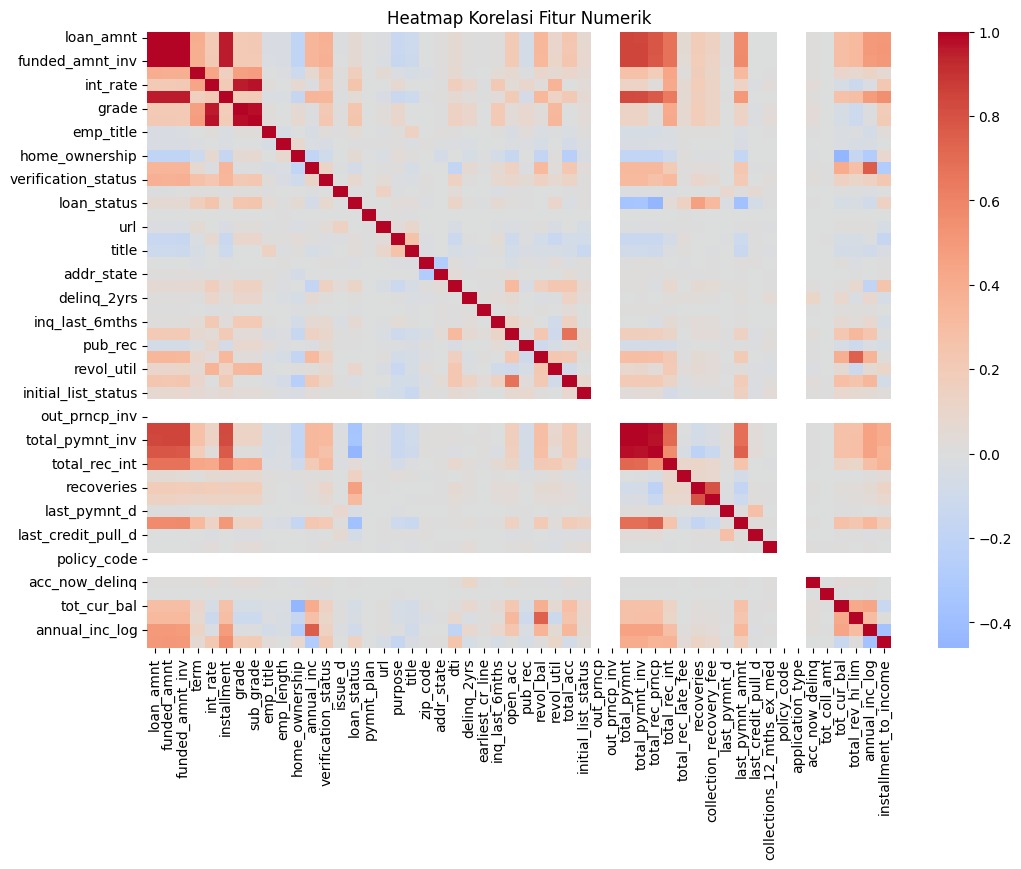

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih kolom numerik
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi
corr = numeric_df.corr()

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()


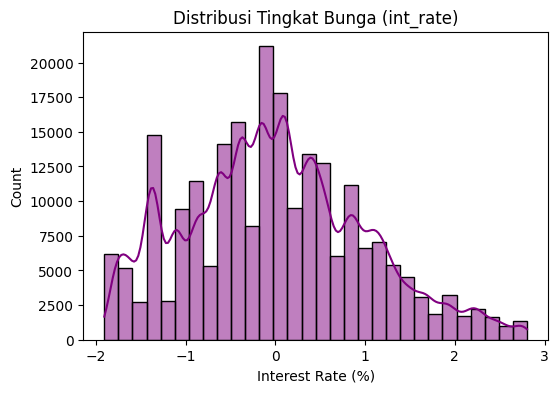

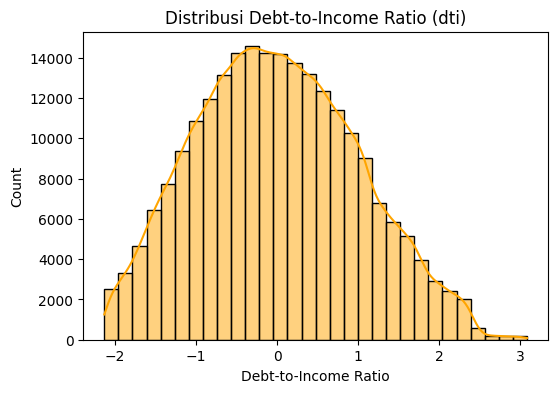

In [ ]:
# Distribusi tingkat bunga (int_rate)
plt.figure(figsize=(6,4))
sns.histplot(df["int_rate"], bins=30, kde=True, color="purple")
plt.title("Distribusi Tingkat Bunga (int_rate)")
plt.xlabel("Interest Rate (%)")
plt.show()

# Distribusi Debt-to-Income Ratio (dti)
plt.figure(figsize=(6,4))
sns.histplot(df["dti"], bins=30, kde=True, color="orange")
plt.title("Distribusi Debt-to-Income Ratio (dti)")
plt.xlabel("Debt-to-Income Ratio")
plt.show()


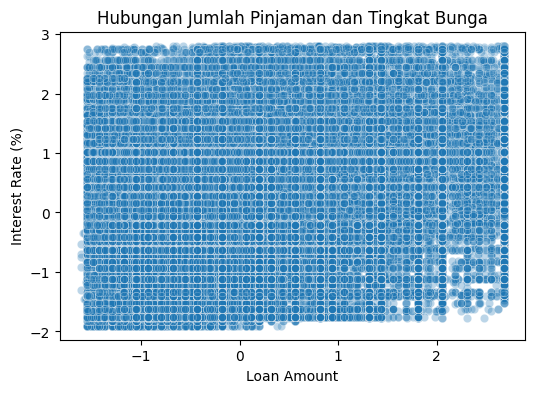

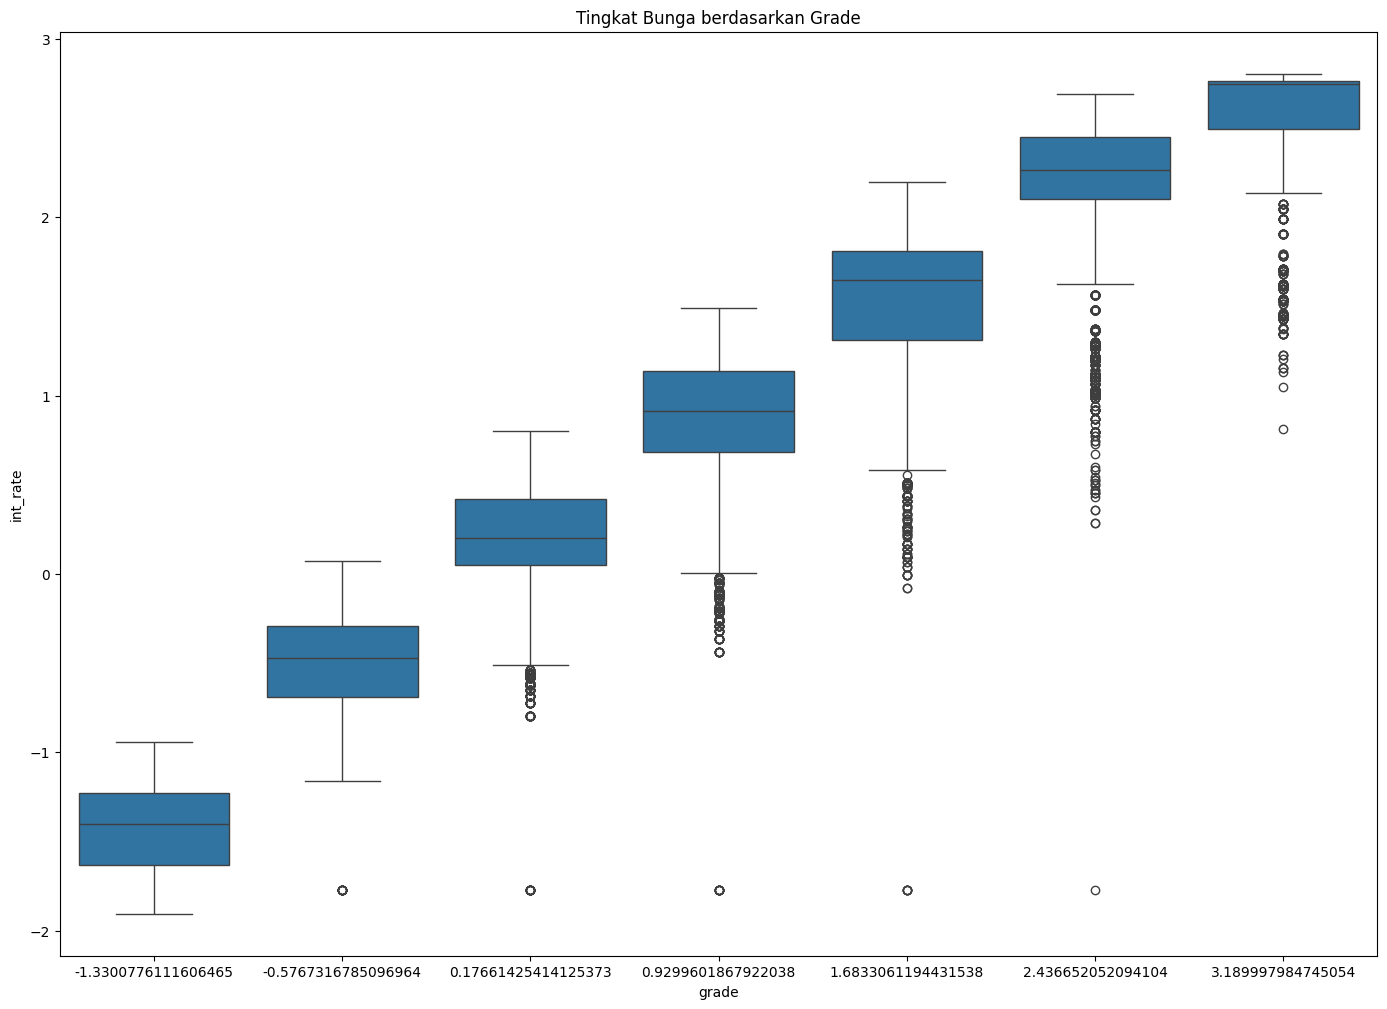

In [ ]:
# Hubungan jumlah pinjaman dan bunga
plt.figure(figsize=(6,4))
sns.scatterplot(x="loan_amnt", y="int_rate", data=df, alpha=0.3)
plt.title("Hubungan Jumlah Pinjaman dan Tingkat Bunga")
plt.xlabel("Loan Amount")
plt.ylabel("Interest Rate (%)")
plt.show()

# Tingkat bunga berdasarkan grade
plt.figure(figsize=(17,12))
sns.boxplot(x="grade", y="int_rate", data=df, order=sorted(df["grade"].dropna().unique()))
plt.title("Tingkat Bunga berdasarkan Grade")
plt.show()

/tmp/ipython-input-469149930.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="loan_status", y="int_rate", data=df, palette="Set2")


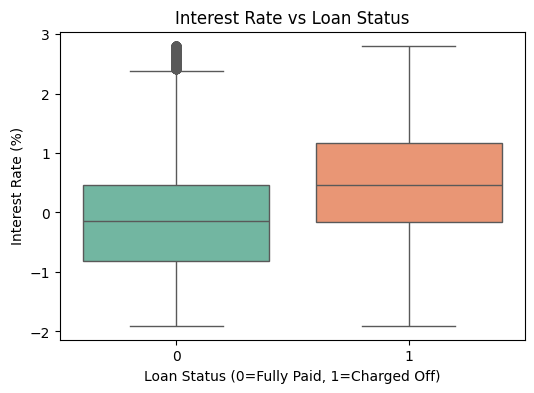

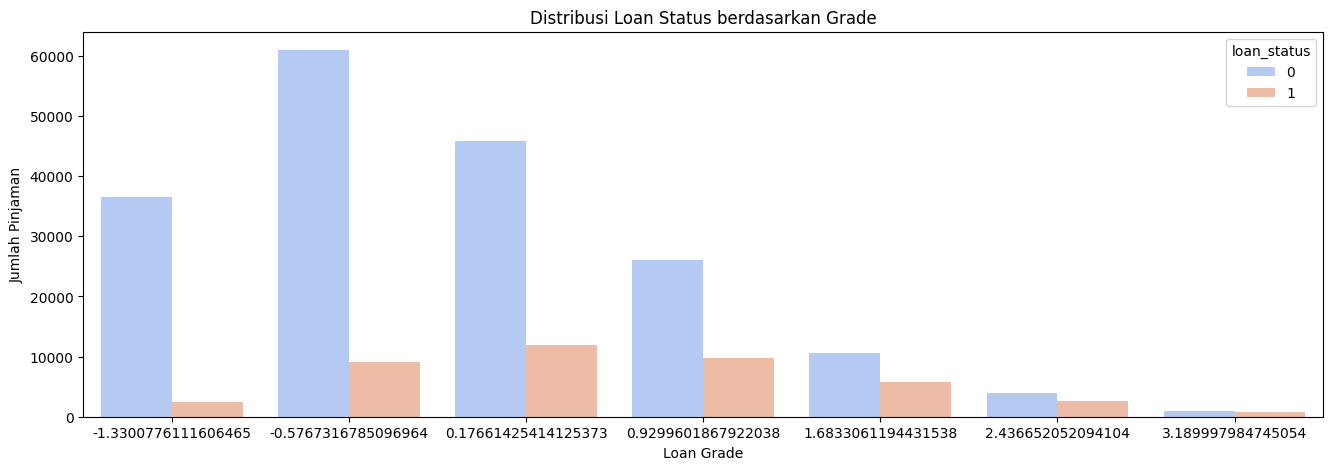

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="loan_status", y="int_rate", data=df, palette="Set2")
plt.title("Interest Rate vs Loan Status")
plt.xlabel("Loan Status (0=Fully Paid, 1=Charged Off)")
plt.ylabel("Interest Rate (%)")
plt.show()

plt.figure(figsize=(16,5))
sns.countplot(x="grade", hue="loan_status", data=df, palette="coolwarm")
plt.title("Distribusi Loan Status berdasarkan Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Jumlah Pinjaman")
plt.show()

In [ ]:
# Drop kolom dengan missing >50%
missing_ratio = df.isnull().sum() / len(df)
df = df.drop(columns=missing_ratio[missing_ratio > 0.5].index)

# Imputasi missing values
for col in df.columns:
    if df[col].dtype in ["float64", "int64"]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Transformasi log untuk annual_inc
df["annual_inc_log"] = np.log1p(df["annual_inc"])

# Encoding kategorikal
categorical_cols = df.select_dtypes(include=["object"]).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Scaling numerik
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.drop("loan_status")
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


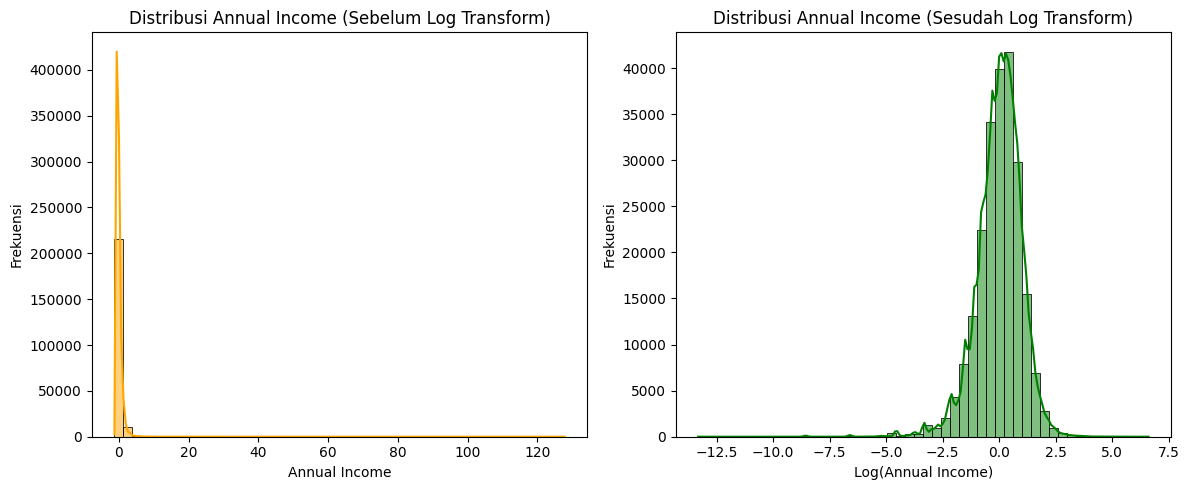

In [ ]:
plt.figure(figsize=(12,5))

# Distribusi sebelum log transform
plt.subplot(1,2,1)
sns.histplot(df["annual_inc"], bins=50, kde=True, color="orange")
plt.title("Distribusi Annual Income (Sebelum Log Transform)")
plt.xlabel("Annual Income")
plt.ylabel("Frekuensi")

# Distribusi sesudah log transform
plt.subplot(1,2,2)
sns.histplot(df["annual_inc_log"], bins=50, kde=True, color="green")
plt.title("Distribusi Annual Income (Sesudah Log Transform)")
plt.xlabel("Log(Annual Income)")
plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df.drop(columns=["loan_status"])
y = df["loan_status"]

# Split dengan stratifikasi agar distribusi target tetap seimbang
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pastikan tidak ada NaN di train dan test
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

print("Ukuran Dataset:")
print("Train set:", X_train.shape, "Target train:", y_train.shape)
print("Test set :", X_test.shape, "Target test :", y_test.shape)

# Tambahkan distribusi target agar lebih jelas
print("\nDistribusi Target di Train Set:")
print(y_train.value_counts(normalize=True))

print("\nDistribusi Target di Test Set:")
print(y_test.value_counts(normalize=True))

Ukuran Dataset:
Train set: (181771, 51) Target train: (181771,)
Test set : (45443, 51) Target test : (45443,)

Distribusi Target di Train Set:
loan_status
0    0.813061
1    0.186939
Name: proportion, dtype: float64

Distribusi Target di Test Set:
loan_status
0    0.813063
1    0.186937
Name: proportion, dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    solver="liblinear",  # solver lebih stabil
    random_state=42
)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:,1]

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC: {:.3f}".format(roc_auc_score(y_test, y_prob_log)))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36948
           1       0.99      0.99      0.99      8495

    accuracy                           1.00     45443
   macro avg       1.00      1.00      1.00     45443
weighted avg       1.00      1.00      1.00     45443

ROC-AUC: 0.999


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC: {:.3f}".format(roc_auc_score(y_test, y_prob_rf)))


=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36948
           1       1.00      0.99      0.99      8495

    accuracy                           1.00     45443
   macro avg       1.00      0.99      1.00     45443
weighted avg       1.00      1.00      1.00     45443

ROC-AUC: 1.000


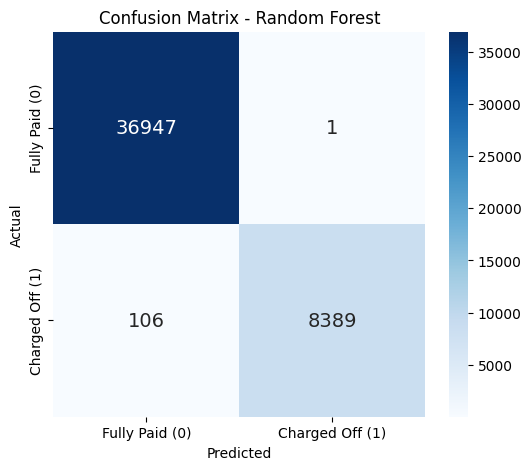

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm_rf, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Fully Paid (0)", "Charged Off (1)"],
    yticklabels=["Fully Paid (0)", "Charged Off (1)"],
    annot_kws={"size":14}
)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Sekian dan Terima kasih :>